# ggplot2 Reference

[Ben Lambert Introduction to grammar of graphics YouTube Video Series](https://www.youtube.com/watch?v=Sc5sksTcr4A&list=PLwJRxp3blEvaYRYWTqQ5ScIow8ZBm3Q92&index=2)

[course github](https://github.com/ben18785/introduction_to_grammar_of_graphics)

In [1]:
library(ggplot2)
library(rethinking)
setwd("/media/david/T7/code/statistical-rethinking")

Loading required package: rstan

Loading required package: StanHeaders

rstan (Version 2.21.5, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstanr version 0.5.2

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /home/david/.cmdstan/cmdstan-2.30.0

- CmdStan version: 2.30.0


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:stats’:

    rstudent




In [2]:
df <- read.csv(file=file.path('data/kaggle-suicide-rates/master.csv'))
print(class(df))
head(df)

[1] "data.frame"


,country,year,sex,age,suicides_no,population,suicides.100k.pop,country.year,HDI.for.year,gdp_for_year....,gdp_per_capita....,generation
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NA,"2,156,624,900",796,Generation X
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NA,"2,156,624,900",796,Silent
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NA,"2,156,624,900",796,Generation X
4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NA,"2,156,624,900",796,G.I. Generation
5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NA,"2,156,624,900",796,Boomers
6,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NA,"2,156,624,900",796,G.I. Generation


In [3]:
precis(df)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
country,NaN,NA,NA,NA,
year,2.001258e+03,8.469055e+00,1987.000,2014.00,▅▅▇▇▇▇▁
sex,NaN,NA,NA,NA,
age,NaN,NA,NA,NA,
suicides_no,2.425744e+02,9.020479e+02,0.000,968.00,▇▁▁▁▁▁▁▁▁▁▁▁
population,1.844794e+06,3.911779e+06,7588.225,8369847.00,▇▁▁▁▁▁▁▁▁
suicides.100k.pop,1.281610e+01,1.896151e+01,0.000,47.60,▇▁▁▁▁▁▁▁▁▁▁▁
country.year,NaN,NA,NA,NA,
HDI.for.year,7.766011e-01,9.336671e-02,0.623,0.91,▁▁▁▃▅▇▇▇▇▃


## Video # 2

### Standard Way

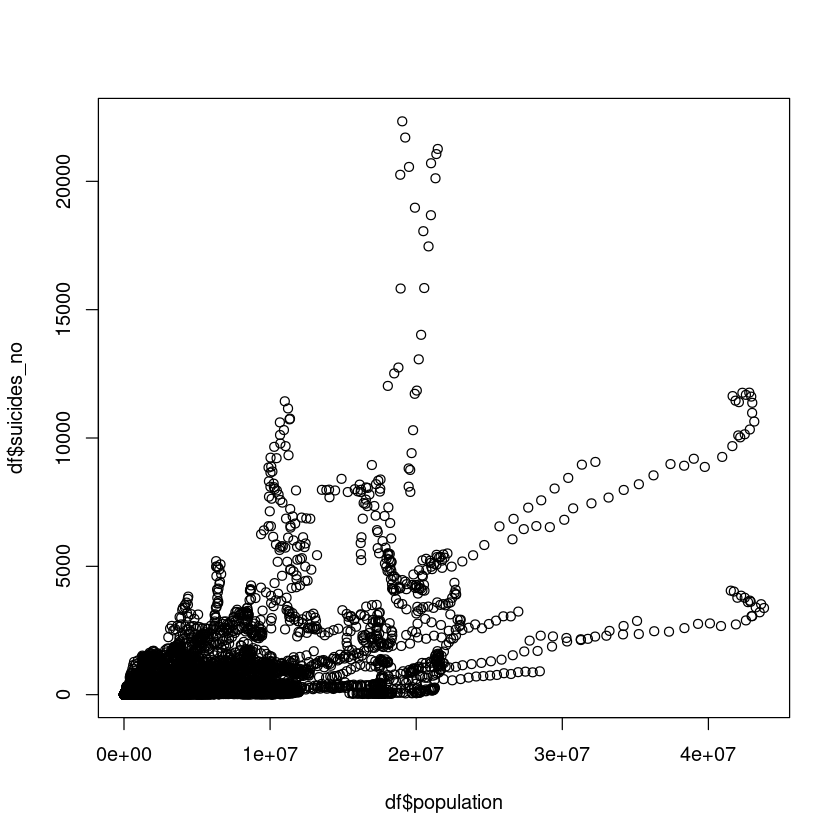

In [4]:
plot(df$population, df$suicides_no)

### ggplot way

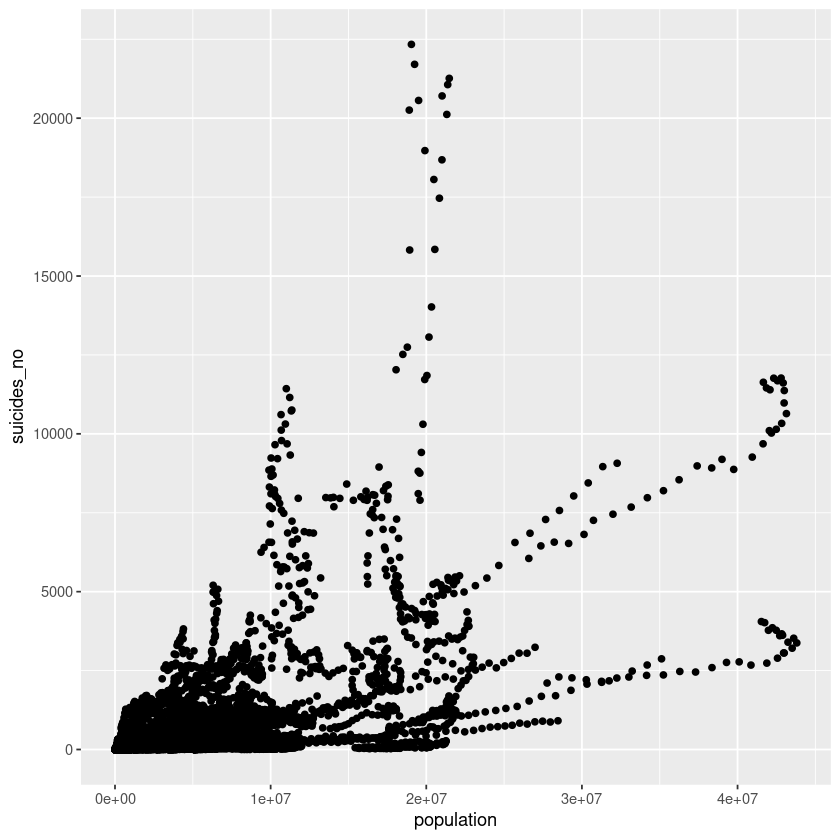

In [5]:
ggplot(df, aes(x=population, y=suicides_no)) +
    geom_point()

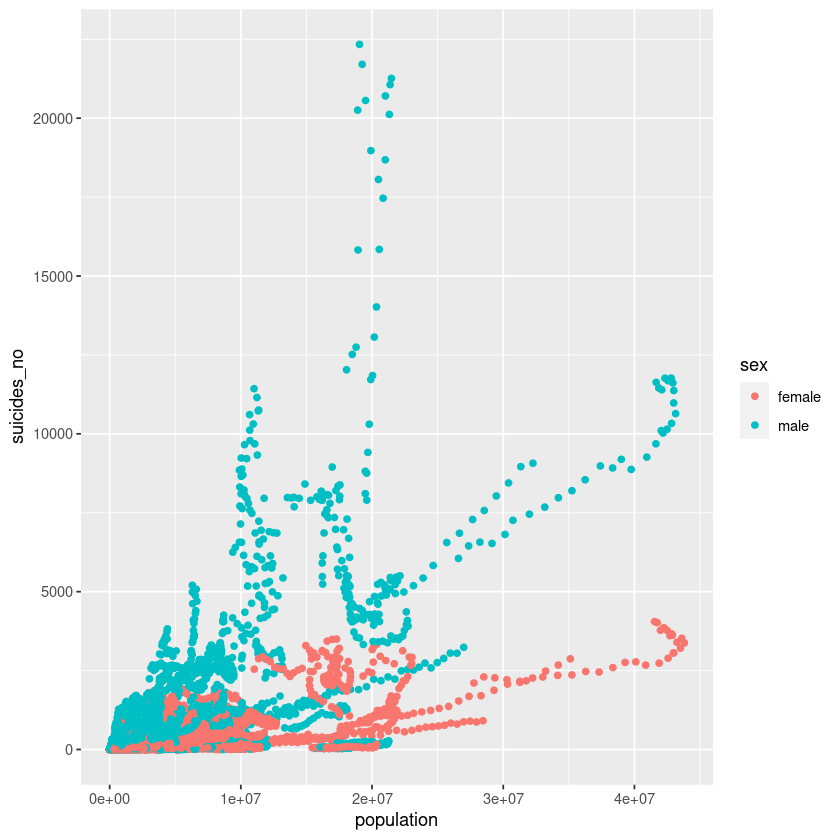

In [6]:
# Color the points on some category
ggplot(df, aes(x=population, y=suicides_no, colour=sex)) +
    geom_point()

## Video # 3

#### Aesthetic Mappings
+ aesthetic mapping - aesthetic means a characteristic of something you can see, an `aes` aesthetic maps the data point to something you can see
+ `aes(x=population, y=suicides_no, colour=sex)`
    + population gets mapped to horizontal position by `x`
    + suicide_no gets mapped to vertical position by `y`
    + sex gets mapped to a color by `colour`
    + Other aesthetics are `shape`, `size`
+ geoms control how aesthetics are displayed    

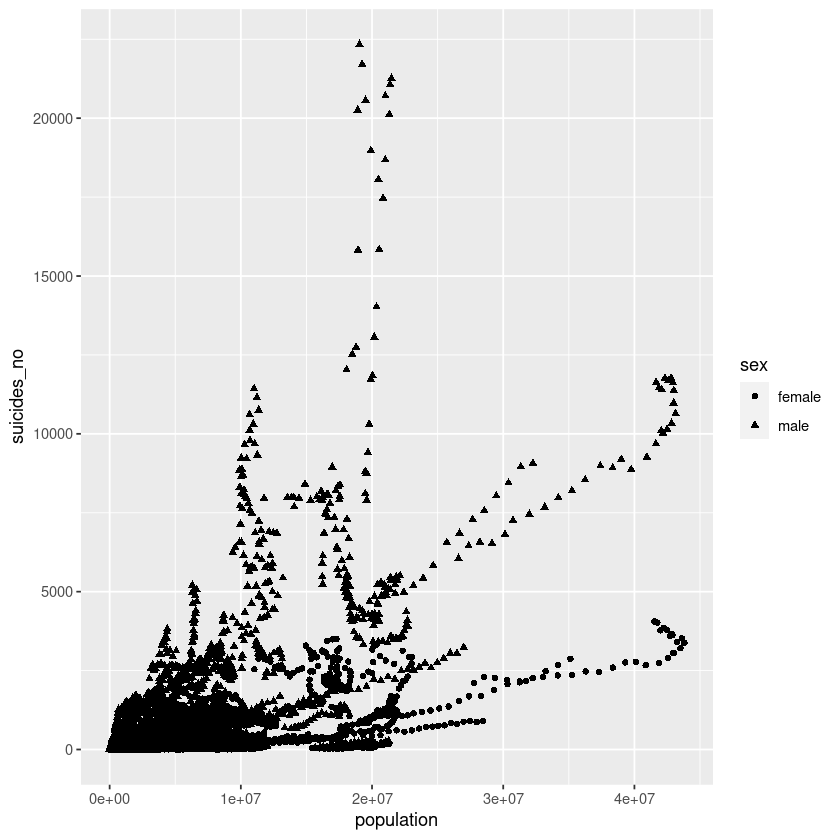

In [7]:
# Shape the points on some category
ggplot(df, aes(x=population, y=suicides_no, shape=sex)) +
    geom_point()

Warning message:
“Using size for a discrete variable is not advised.”


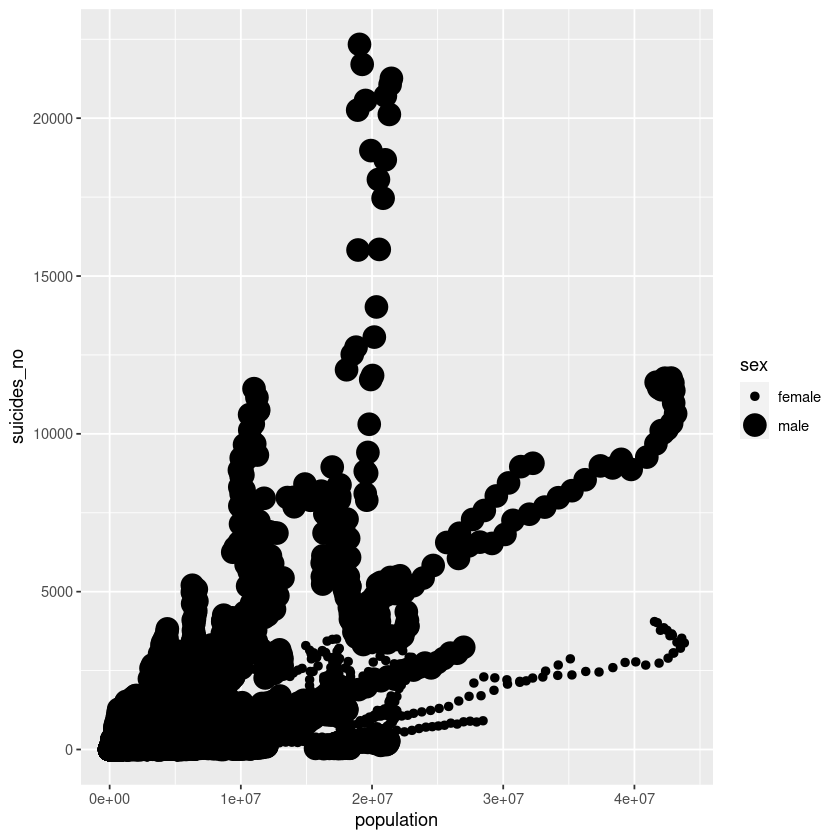

In [8]:
# Shape the points on some category
ggplot(df, aes(x=population, y=suicides_no, size=sex)) +
    geom_point()

In [9]:
# ggplot(df, aes(x=population, size=suicides_no)) +
#     geom_point()

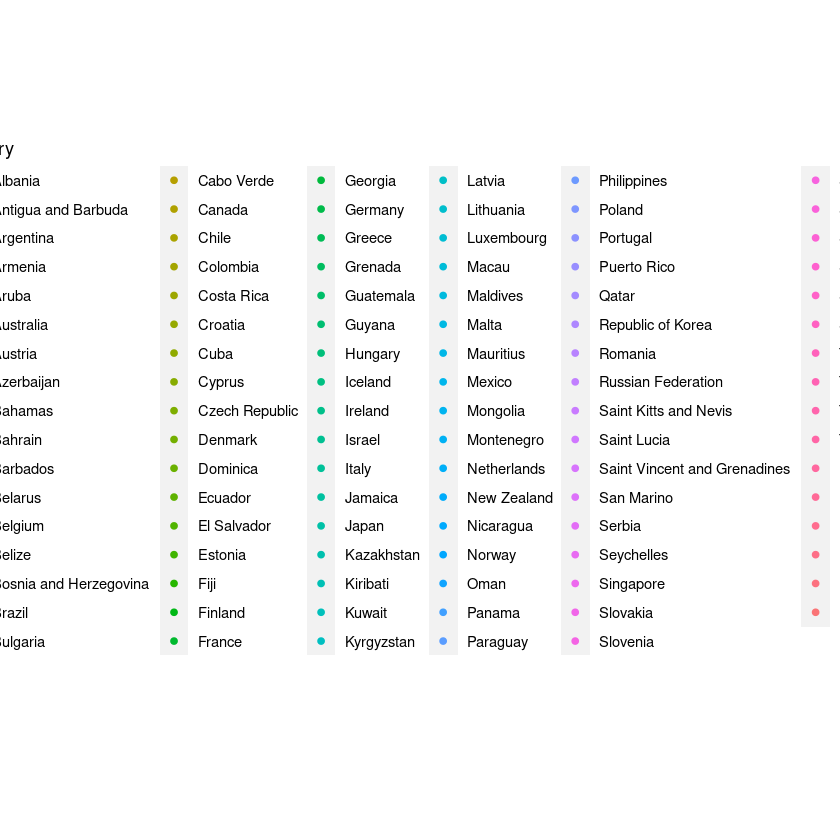

In [10]:
# Why doesn't country work?
ggplot(df, aes(x=population, y=suicides_no, colour=country)) +
    geom_point()

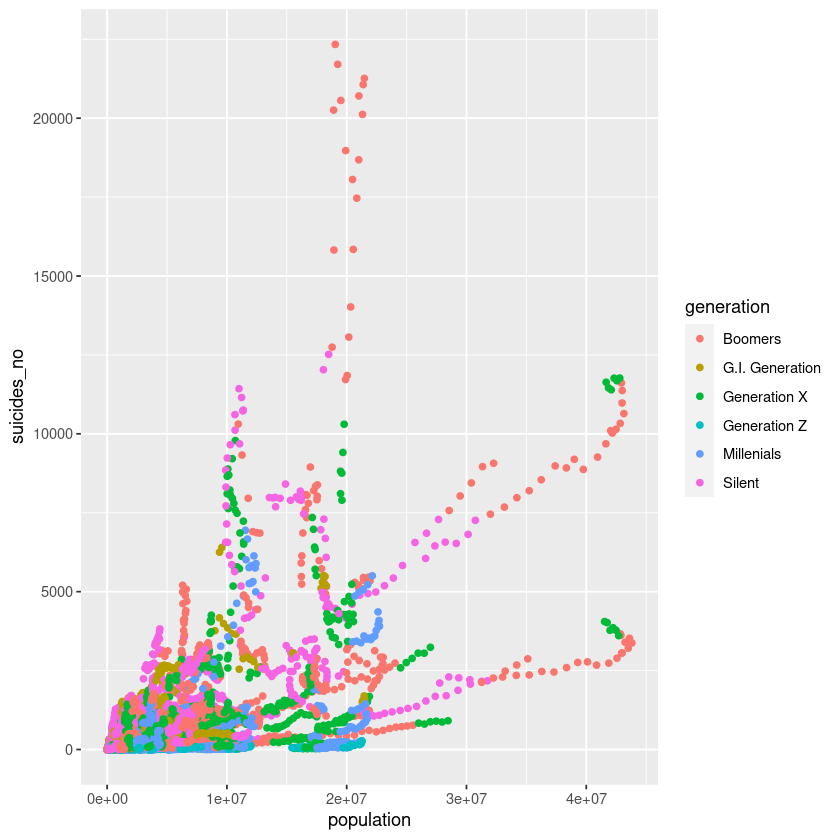

In [11]:
ggplot(df, aes(x=population, y=suicides_no, colour=generation)) +
    geom_point()

### Adding another geom

#### Regression by Category

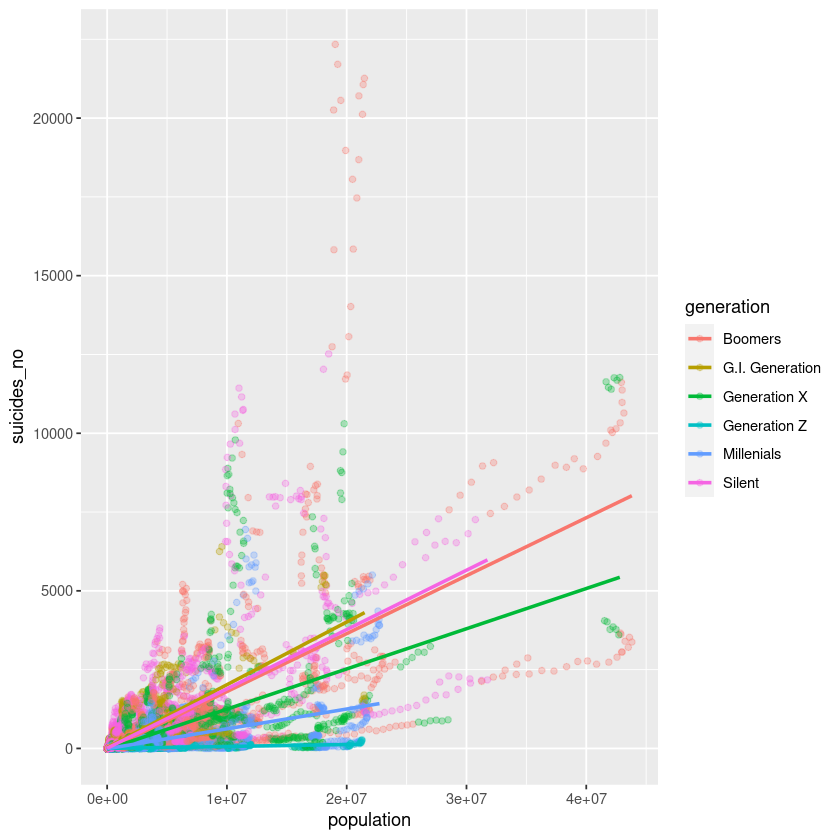

In [12]:
# geom_smooth inherits from the aes function the data is categorized by color
# and so applies the linear regression within each color
ggplot(df, aes(x=population, y=suicides_no, colour=generation)) +
    geom_point(alpha=0.3) + geom_smooth(method='lm', formula= 'y ~ x', se=F)

#### Overall Regression

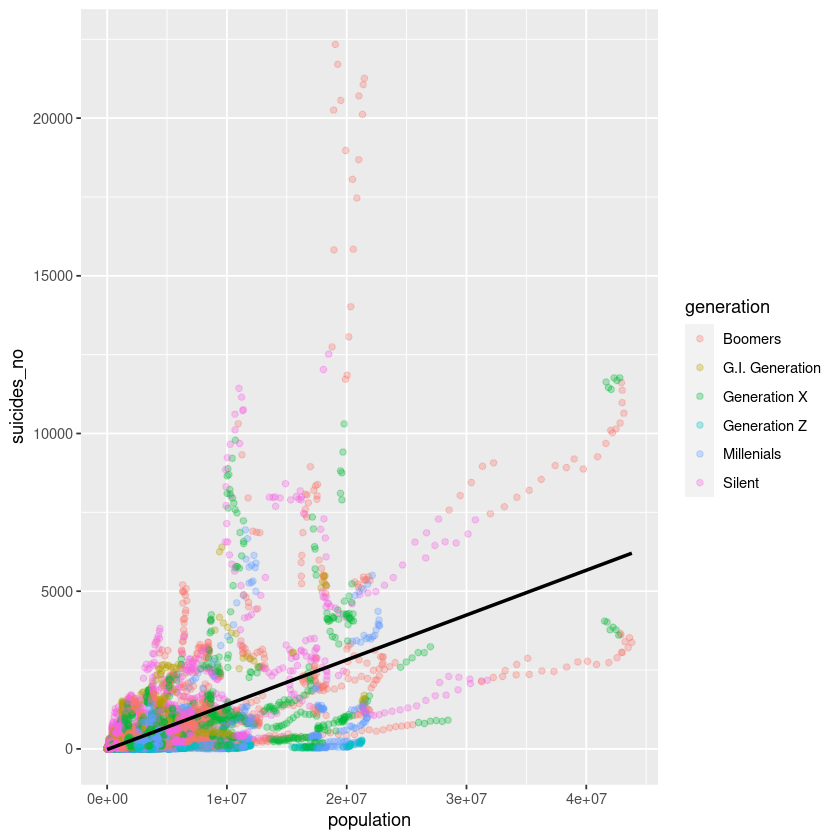

In [13]:
ggplot(df, aes(x=population, y=suicides_no)) +
    geom_point(alpha=0.3, aes(colour=generation)) +
    geom_smooth(method='lm', se=F, colour='black', formula='y ~ x')

## Geoms
+ geometrical element used to represent data
+ Take the x, y data and visualize it in different ways
+ `geom_smooth` draws some sort of regression line
+ `geom_line`, `geom_histogram`, `geom_violin`, `geom_rectangle`

### Simple geom Example

In [14]:
df1 <- data.frame(x=1:3, y=c(2, 4, 10), label=c('a', 'b', 'c'))
df1

x,y,label
<int>,<dbl>,<chr>
1,2,a
2,4,b
3,10,c


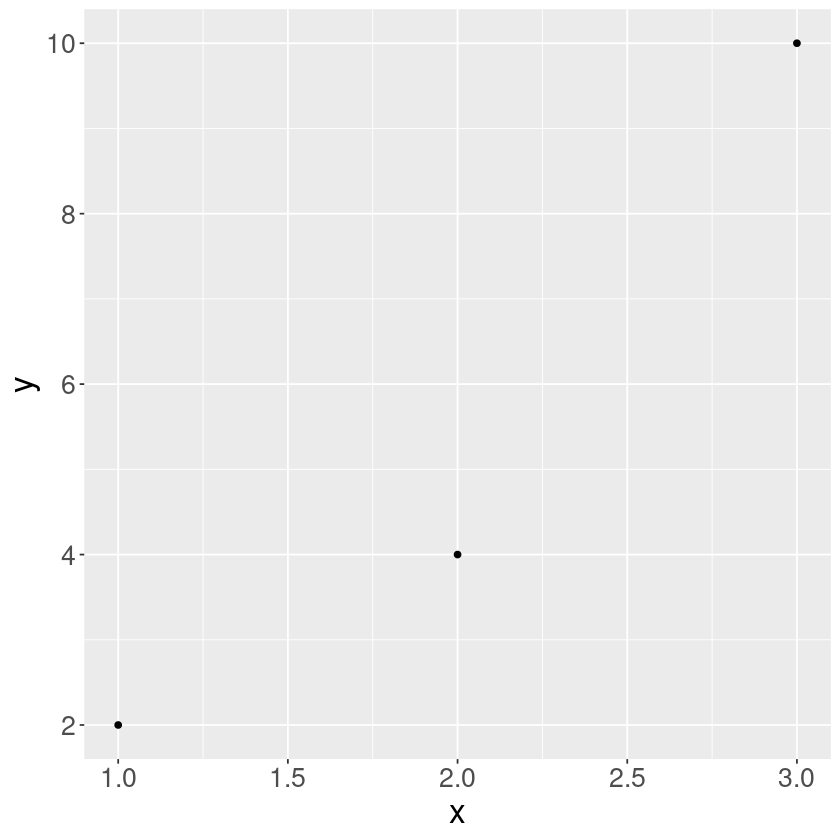

In [15]:
ggplot(df1, aes(x=x, y=y, label=label)) +
    theme(text=element_text(size=20)) +
    geom_point()

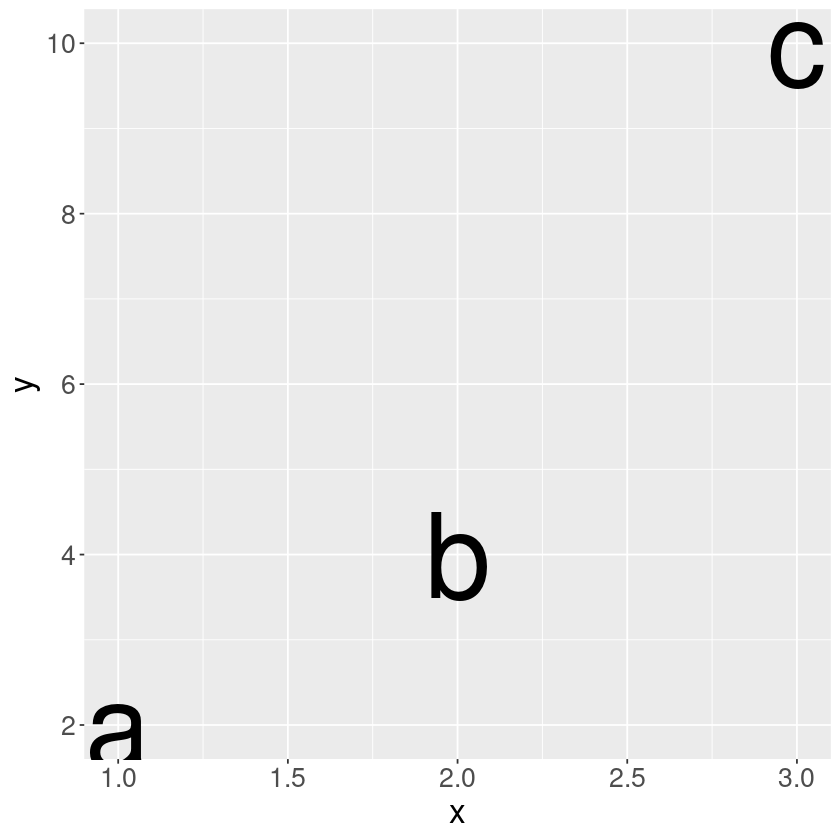

In [16]:
ggplot(df1, aes(x=x, y=y, label=label)) +
    theme(text=element_text(size=20)) +
    geom_text(size=25)

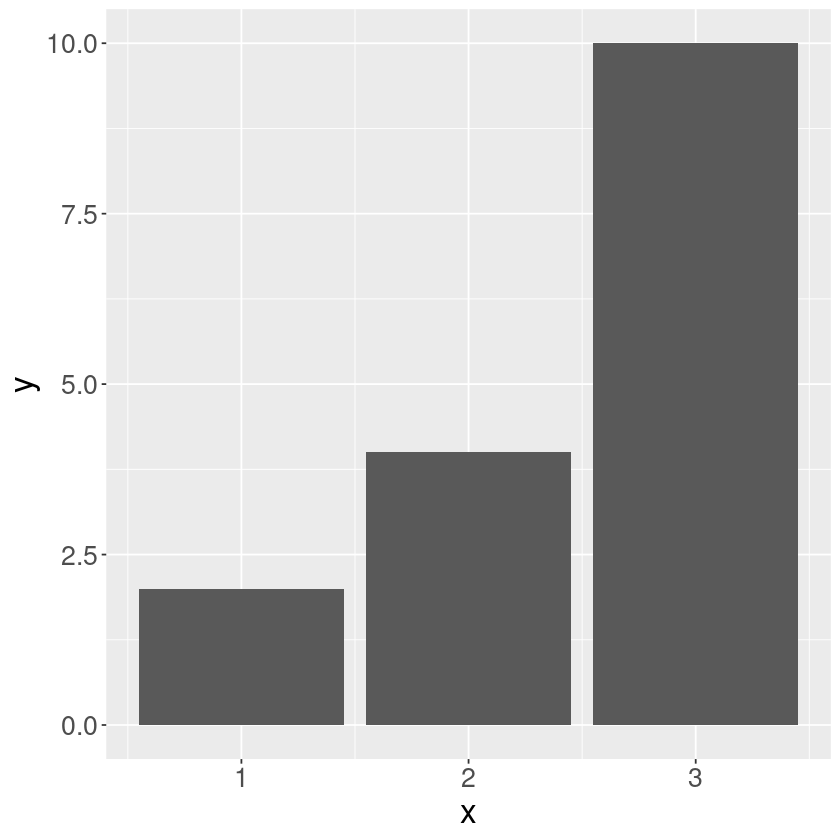

In [17]:
ggplot(df1, aes(x=x, y=y, label=label)) +
    theme(text=element_text(size=20)) +
    geom_col()

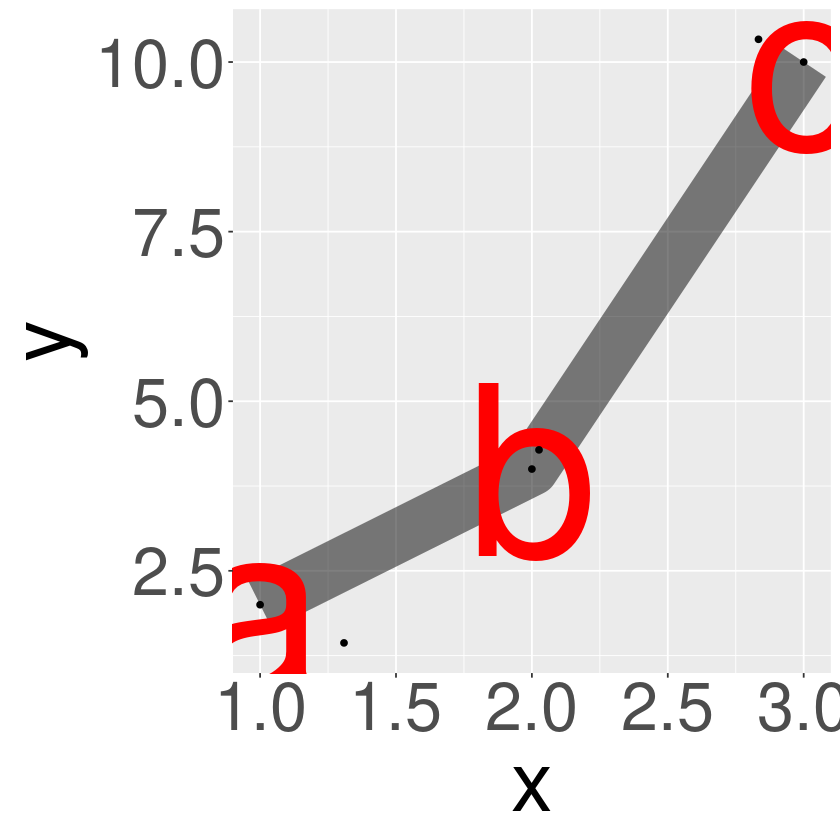

In [18]:
ggplot(df1, aes(x=x, y=y, label=label)) +
    theme(text=element_text(size=50)) +
    geom_line(size=15, alpha=0.5) +
    geom_text(size=50, colour='red') +
    geom_point() +
    geom_jitter()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.99”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.0201”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data values than degrees of freedom.”
Warning message in predLoess(object$y, object$

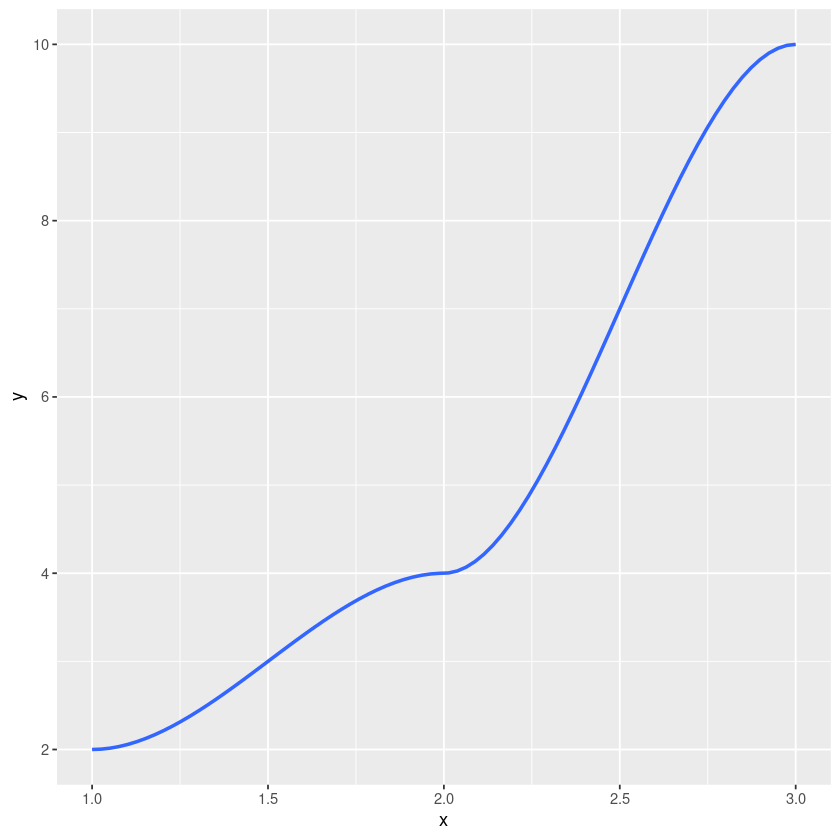

In [19]:
ggplot(df1, aes(x=x, y=y, label=label)) +
    geom_smooth()

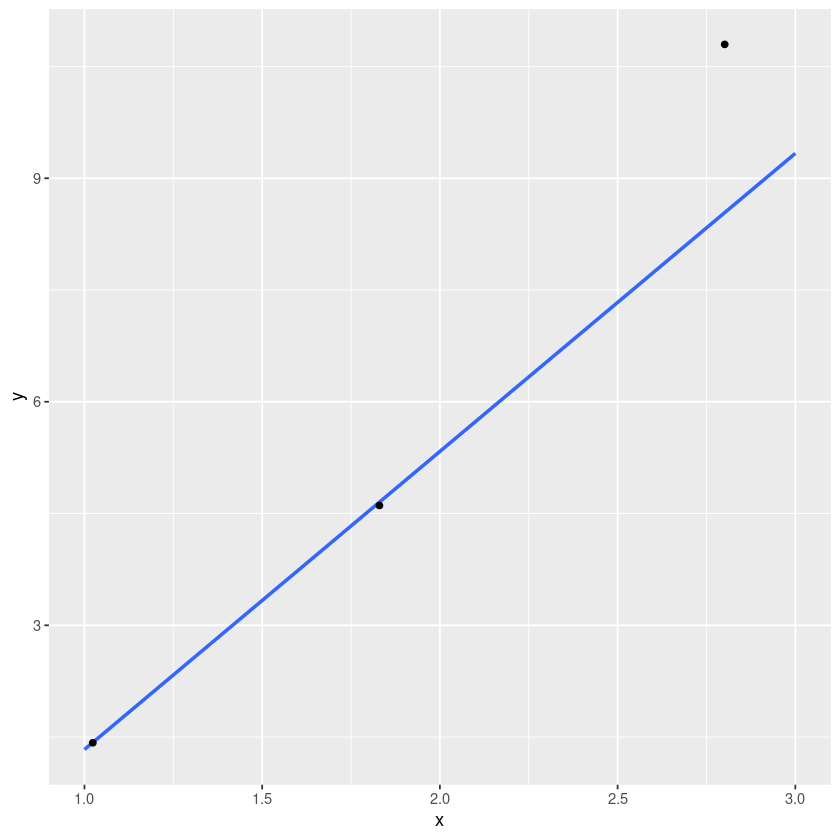

In [20]:
ggplot(df1, aes(x=x, y=y, label=label)) +
    geom_smooth(method='lm', se=F, formula=y~x) +
    geom_jitter()

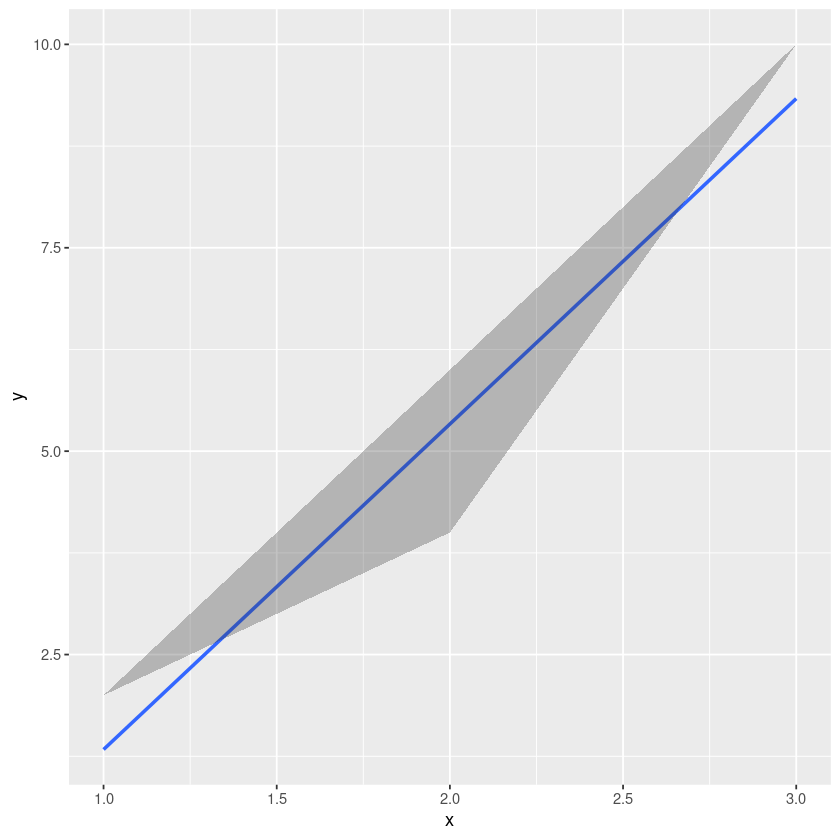

In [21]:
ggplot(df1, aes(x=x, y=y, label=label)) +
    geom_smooth(method='lm', se=F, formula=y~x) +
    geom_polygon(alpha=0.3)

### Order of layering

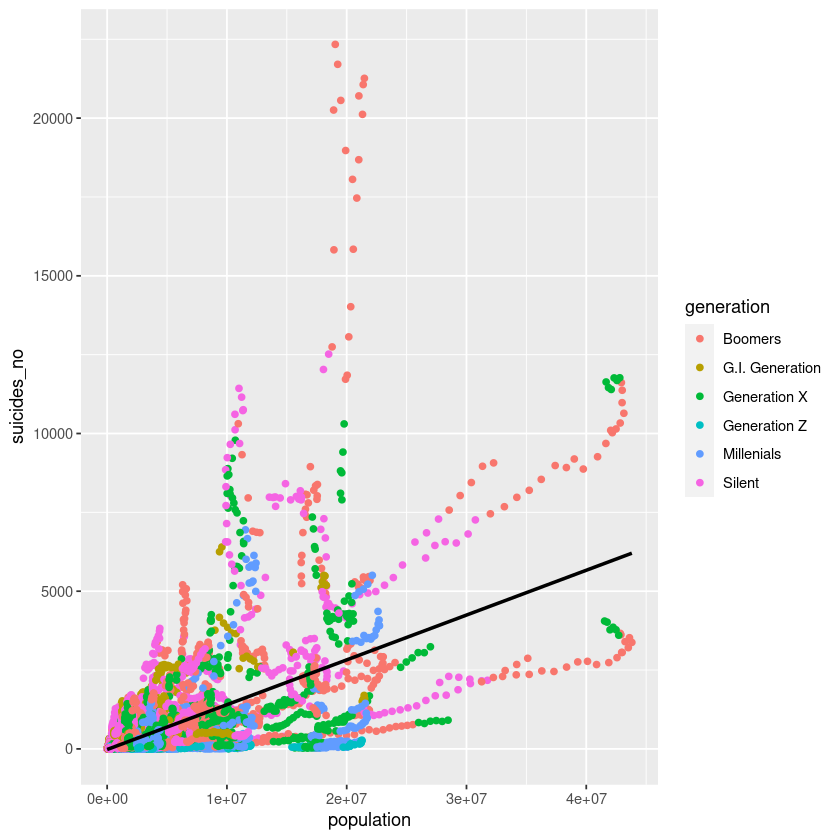

In [22]:
ggplot(data=df, aes(x=population, y=suicides_no)) +
    geom_point(alpha=1, aes(color=generation)) +
    geom_smooth(method='lm', se=F, colour='black', formula=y~x)

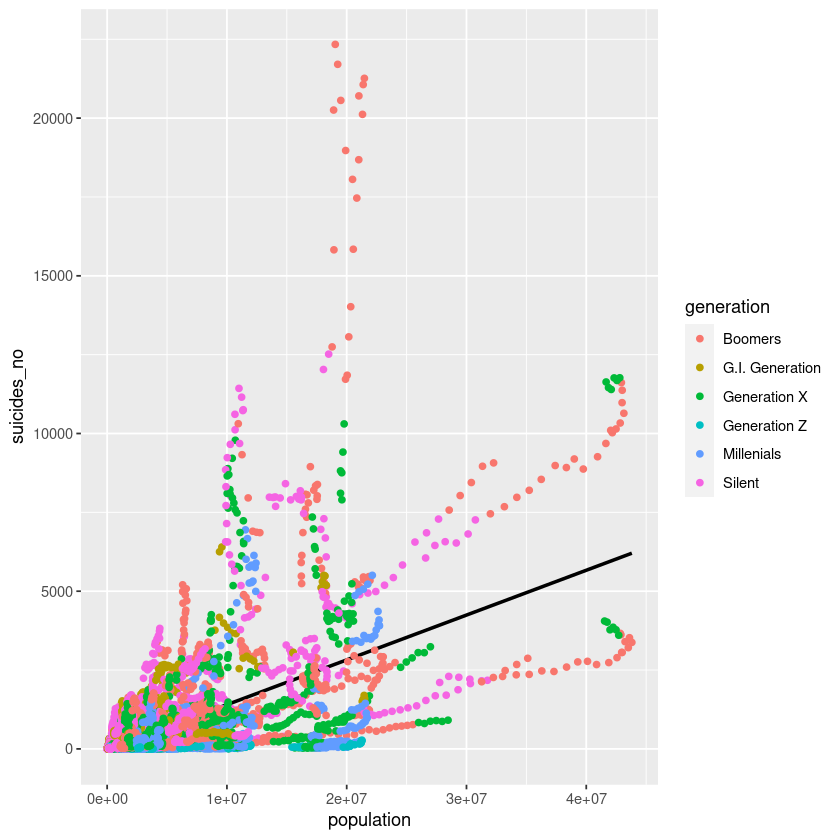

In [23]:
ggplot(data=df, aes(x=population, y=suicides_no)) +
    geom_smooth(method='lm', se=F, colour='black', formula=y~x) +
    geom_point(alpha=1, aes(color=generation))

### Change axis scales

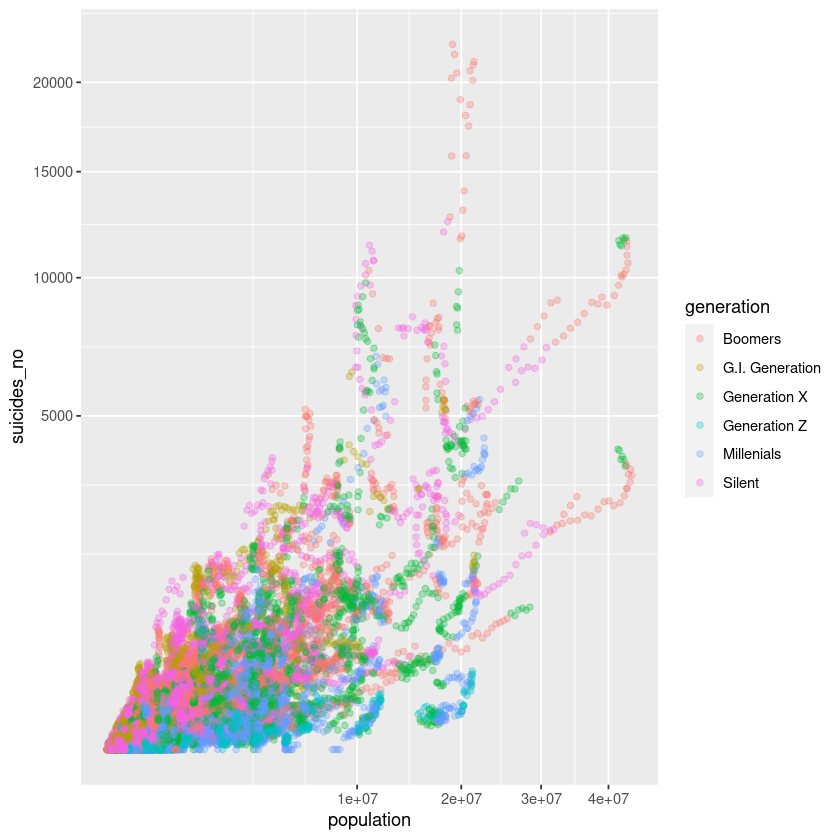

In [24]:
ggplot(data=df, aes(x=population, y=suicides_no)) + 
    geom_point(alpha=0.3, aes(color=generation)) +
    scale_x_sqrt() + scale_y_sqrt()

## Video # 5

+ What has happened to suicide trends over time?

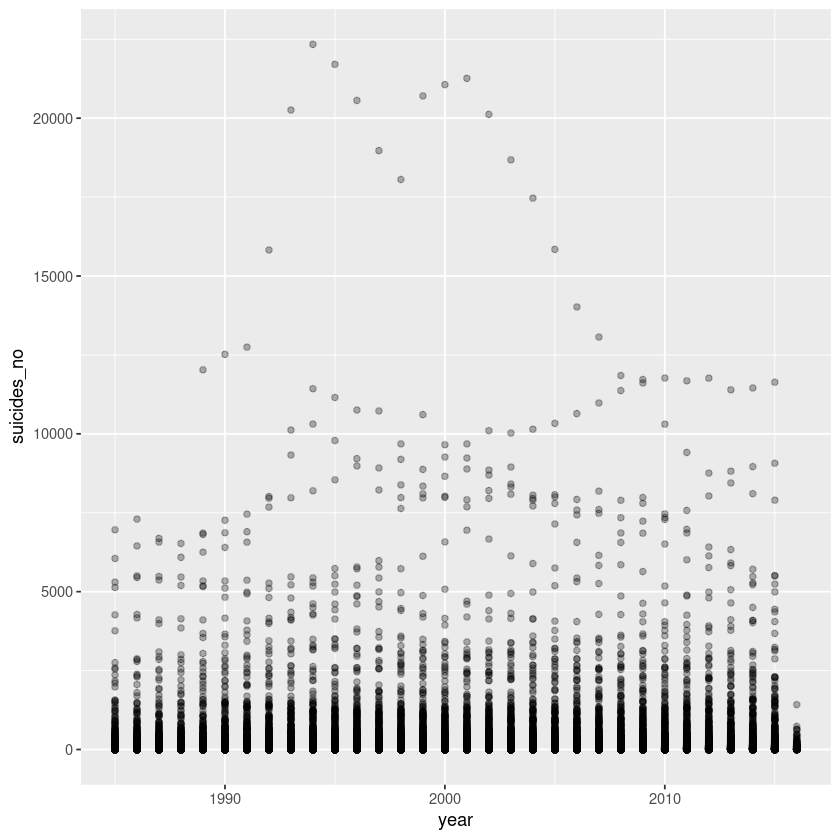

In [25]:
ggplot(data=df, aes(x=year, y=suicides_no)) +
    geom_point(alpha=0.3)

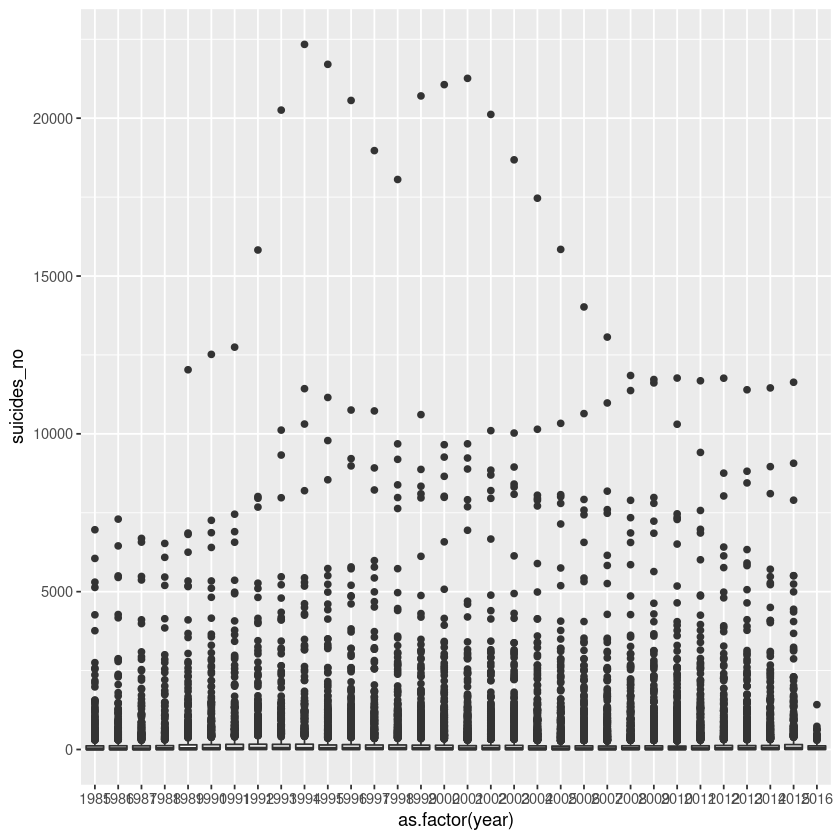

In [26]:
ggplot(data=df, aes(x=as.factor(year), y=suicides_no)) +
    geom_boxplot()

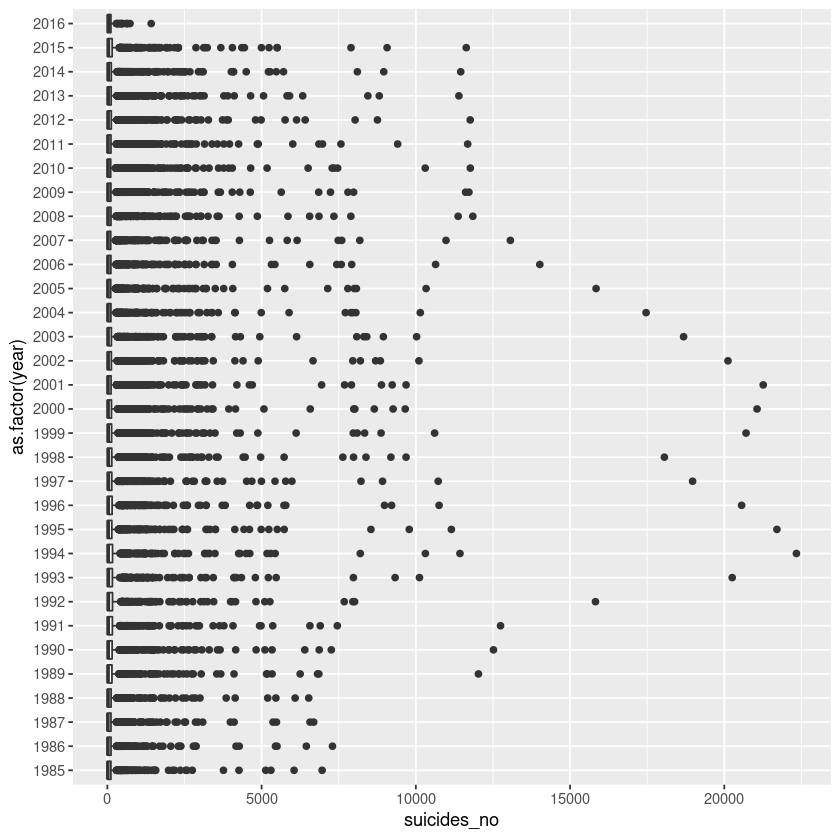

In [27]:
ggplot(data=df, aes(x=as.factor(year), y=suicides_no)) +
    geom_boxplot() +
    coord_flip()

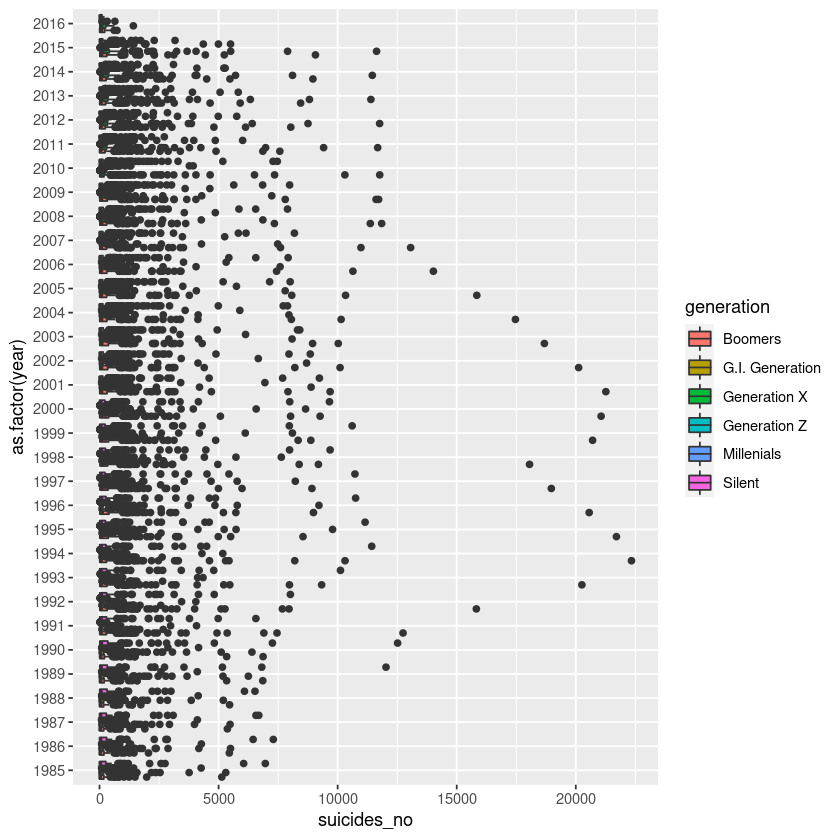

In [28]:
ggplot(df, aes(x=as.factor(year), y=suicides_no, fill=generation)) + 
    geom_boxplot() +
    coord_flip()

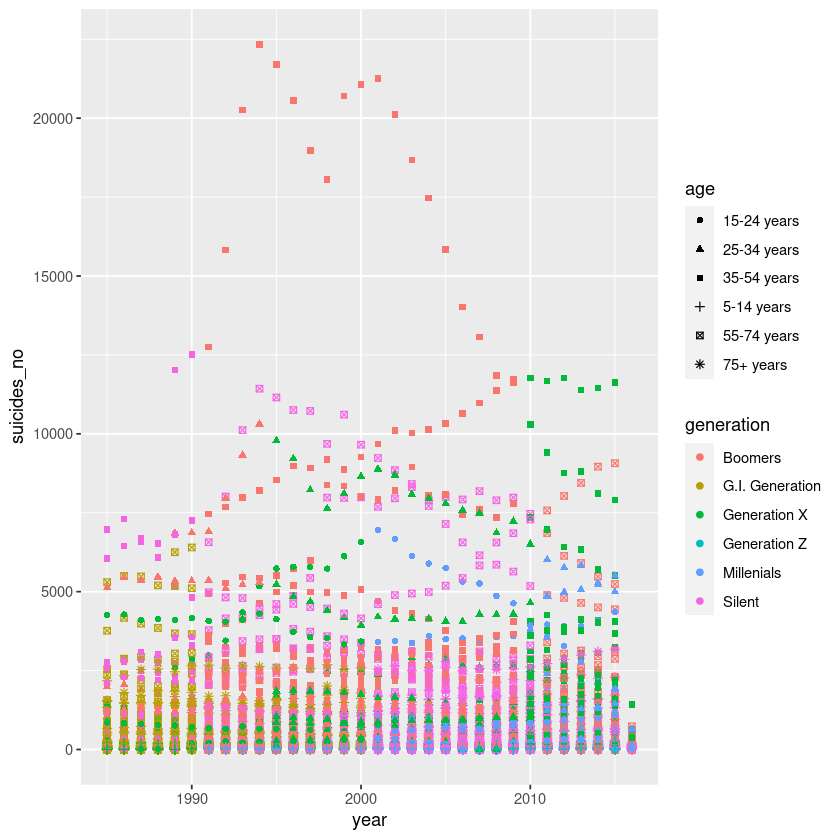

In [29]:
ggplot(data=df, aes(x=year, y=suicides_no, color=generation, shape=age)) +
    geom_point()

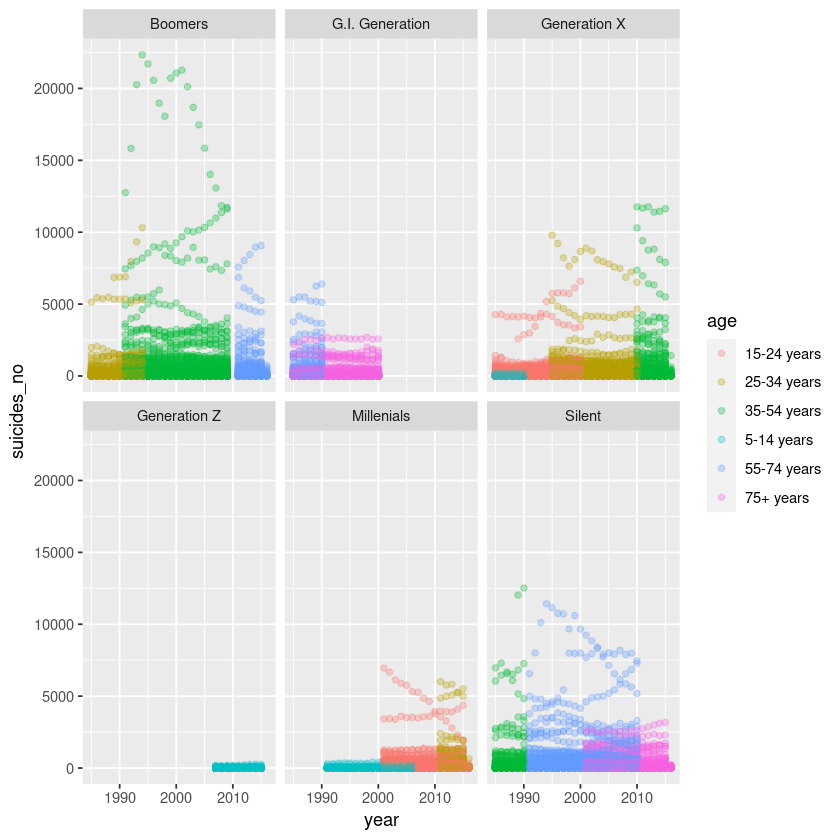

In [30]:
ggplot(data=df, aes(x=year, y=suicides_no, color=age)) +
    geom_point(alpha=0.3) +
    facet_wrap(~generation)

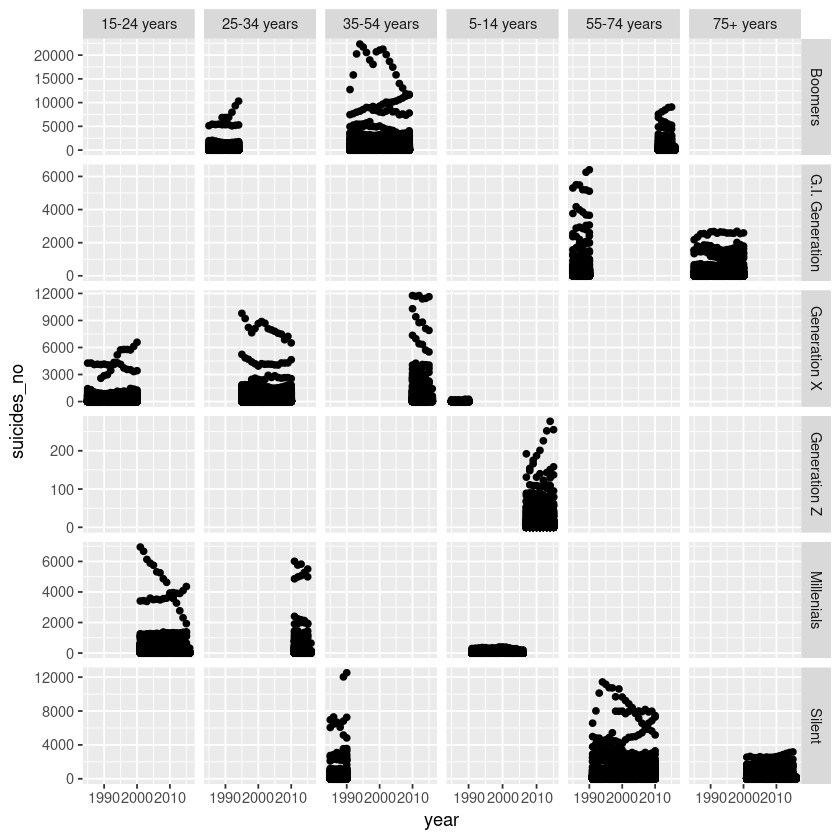

In [31]:
ggplot(data=df, aes(x=year, y=suicides_no)) +
    geom_point() +
    facet_grid(vars(generation), vars(age), scales='free')

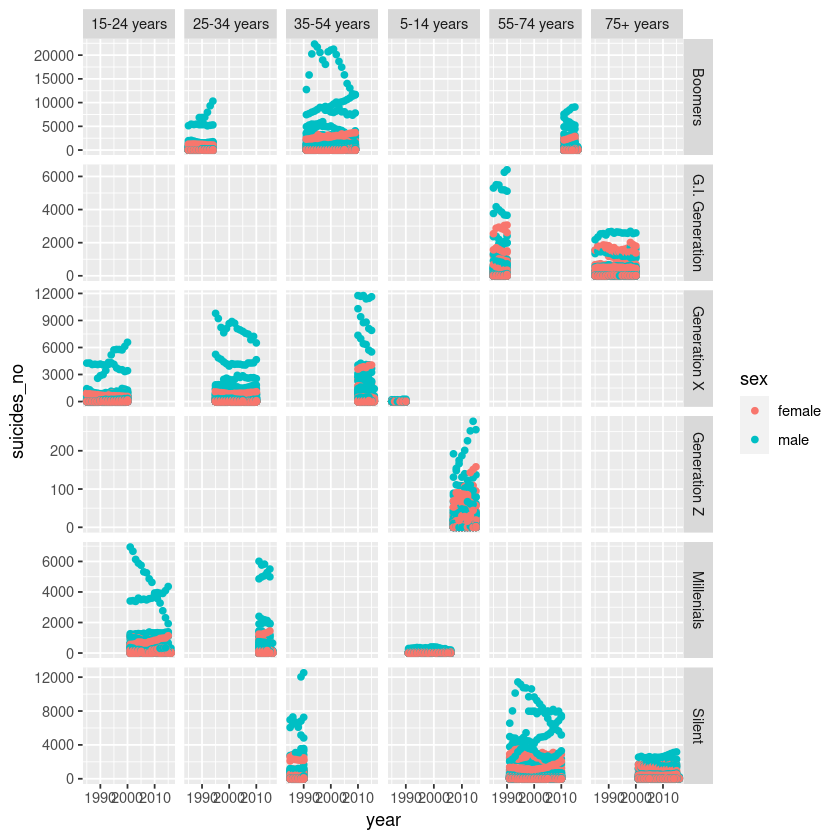

In [32]:
ggplot(data=df, aes(x=year, y=suicides_no, color=sex)) +
    geom_point() +
    facet_grid(vars(generation), vars(age), scales='free')

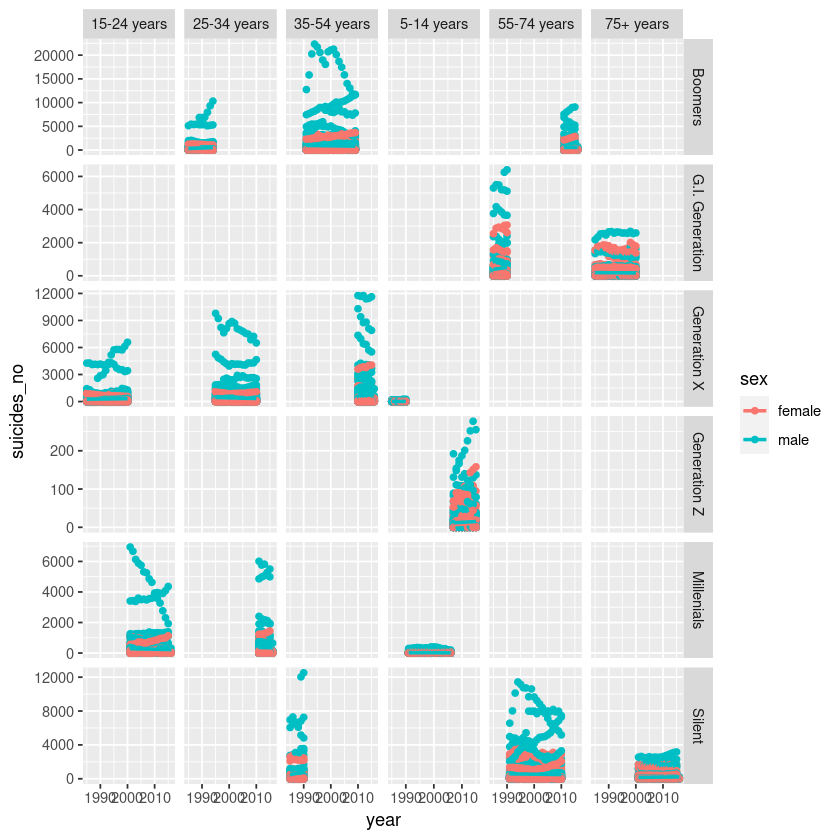

In [33]:
ggplot(data=df, aes(x=year, y=suicides_no, color=sex)) +
    geom_point() +
    facet_grid(vars(generation), vars(age), scales='free') +
    geom_smooth(method='lm', se=F, formula=y~x)